#### EDA and Preprocessing 

#### Task 1

##### import the important libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
dfb = pd.read_csv("C:/Users/27638/Creditrust-RAG-chatbot-/data/complaints.csv")

C:\Users\27638\AppData\Local\Temp\ipykernel_26068\3017873086.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfb = pd.read_csv("C:/Users/27638/Creditrust-RAG-chatbot-/data/complaints.csv")


In [7]:
dfb.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [9]:
dfb.shape

(9609797, 18)

In [10]:
dfb.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [12]:
dfb.describe()

,Complaint ID
count,9.609797e+06
mean,8.092744e+06
std,3.774842e+06
min,1.000000e+00
25%,5.038016e+06
50%,8.448508e+06
75%,1.129591e+07
max,1.423259e+07


In [13]:
# How many complaints have narratives
has_narrative = dfb['Consumer complaint narrative'].notnull().sum()
no_narrative = dfb['Consumer complaint narrative'].isnull().sum()

print(f"Complaints with narrative: {has_narrative}")
print(f"Complaints without narrative: {no_narrative}")

Complaints with narrative: 2980756
Complaints without narrative: 6629041


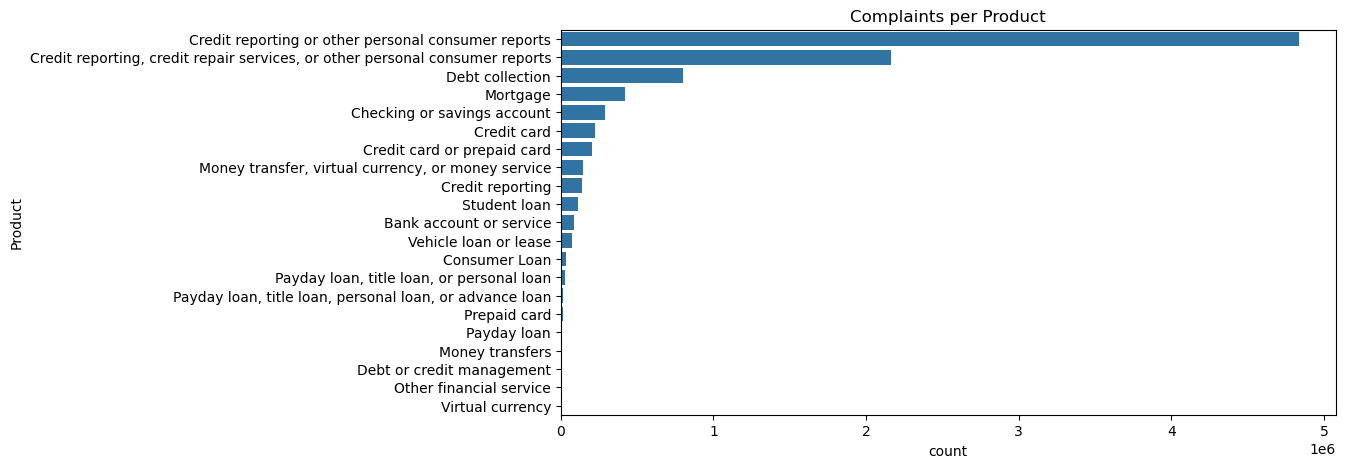

In [14]:
# Product distribution
plt.figure(figsize=(10,5))
sns.countplot(data=dfb, y='Product', order=dfb['Product'].value_counts().index)
plt.title("Complaints per Product")
plt.show()

In [15]:
# Target products
products_of_interest = [
    'Credit card', 
    'Personal loan', 
    'Buy Now, Pay Later', 
    'Savings account', 
    'Money transfer, virtual currency, or money service'
]

# Filter
filtered_df = dfb[
    dfb['Product'].isin(products_of_interest) & 
    dfb['Consumer complaint narrative'].notnull()
].copy()

print("✅ Filtered data shape:", filtered_df.shape)
filtered_df['Product'].value_counts()


✅ Filtered data shape: (177855, 18)


Product
Money transfer, virtual currency, or money service    97188
Credit card                                           80667
Name: count, dtype: int64

In [16]:
# Basic text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove special chars
    text = re.sub(r'\s+', ' ', text).strip()    # remove extra whitespace
    return text

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)


In [17]:
filtered_df.to_csv('../data/filtered_complaints.csv', index=False)
print("✅ Saved cleaned dataset to data/filtered_complaints.csv")


✅ Saved cleaned dataset to data/filtered_complaints.csv
